# Dial tone example

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython

In [4]:
DIALTONE_TABLE = {
    '1': (697, 1209),
    '2': (697, 1336),
    '3': (697, 1477),
    '4': (770, 1209),
    '5': (770, 1336),
    '6': (770, 1477),
    '7': (852, 1209),
    '8': (852, 1336),
    '9': (852, 1477),
    '*': (941, 1209),
    '#': (941, 1477)
}

In [6]:
FS = 24_000
SPACE = 0.1
MARK = 0.1

In [16]:
def dial(number):
    full_signal = np.array([])
    # GENERATE an ndarray of integers that starts at 0 and ends before 2400 
    n = np.arange(0, int(MARK * FS))
    # similarly, we generate a space of no signal that has the same length as the signal.
    zeros = np.zeros(int(SPACE * FS))
    for d in number:
        first = np.sin(2 * np.pi * DIALTONE_TABLE[d][0]/FS * n)
        second = np.sin(2 * np.pi * DIALTONE_TABLE[d][1]/FS * n)
        full_signal = np.concatenate((full_signal, first + second, zeros))
    return full_signal

In [17]:
x=dial('123##45')

IPython.display.Audio(x, rate=FS)

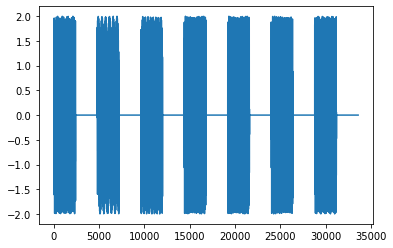

In [11]:
plt.plot(x)

In [23]:
ANALYSIS_WINDOW = 240
print("we sample a value from the function every %F seconds" % (1/FS))
print("we are looking for %d" % (FS/ANALYSIS_WINDOW))

we sample a value from the function every 0.000042 seconds
we are looking for 100
